<a href="https://colab.research.google.com/github/aydelia/mobile1/blob/main/UAS%20Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UAS PROBABILITAS DAN STATISTIKA
Nama   : Adelia Nur Oktariani  
Nim    : 312310096  
Kelas  : TI.23.C2


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [ ]:
# Membaca data dari file Excel
file_path = r"/content/DATA UAS 2024-2025.xlsx"

# Load data
data = pd.read_excel(file_path)

data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,34.37,98.47,1059,78,5.80,2681,1,16.54,13.14,0.59,1
1,44.58,96.21,722,27,9.78,1640,2,22.17,14.09,0.34,2
2,40.81,98.04,614,706,8.22,4517,2,21.00,10.72,1.01,2
3,37.41,98.63,464,41,8.56,850,2,16.05,15.28,0.90,2
4,56.20,97.09,430,418,19.76,1627,3,31.09,20.15,0.59,1
5,58.16,99.49,248,284,27.56,3085,3,40.22,10.30,0.55,1
6,34.99,97.42,389,13,5.00,577,2,15.40,14.76,0.83,1
7,37.32,98.15,1001,32,9.10,1804,2,17.59,9.22,0.35,1
8,39.47,98.55,2592,647,10.42,18571,2,18.02,10.97,0.49,1
9,33.30,96.01,812,535,6.32,14490,2,14.37,10.95,0.48,2


Data didapat dari data Excel yang telah diberikan.

In [ ]:
# Variabel independen (X) dan dependen (Y)
X = data.drop(columns=["Y"])  # Semua kolom kecuali Y
Y = data["Y"]  # Kolom Y sebagai variabel dependen

Memisahkan Variabel  
Y : sebagai dependen  
X1 - X10 : sebagai independen

# 1) Plot & Perhitungan Summary

In [ ]:
# Menghitung ringkasan statistik
summary = data.describe()
print(summary)

               Y         X1           X2          X3         X4            X5  \
count  34.000000  34.000000    34.000000   34.000000  34.000000     34.000000   
mean   37.320000  96.786765   746.941176  186.470588   9.740882   3305.529412   
std     7.896466   3.866710   477.578801  214.991365   6.539585   4350.039312   
min    19.900000  79.210000   248.000000   13.000000   1.610000    275.000000   
25%    33.217500  96.015000   438.500000   42.000000   5.800000    794.500000   
50%    35.895000  98.140000   633.000000   98.000000   8.070000   1722.000000   
75%    40.017500  98.855000   967.250000  215.000000  10.442500   3347.750000   
max    58.160000  99.860000  2592.000000  822.000000  28.470000  18571.000000   

              X6         X7         X8         X9        X10  
count  34.000000  34.000000  34.000000  34.000000  34.000000  
mean    1.823529  17.636176  11.387353   0.516176   1.411765  
std     0.626224   7.451367   3.180884   0.315028   0.499554  
min     1.000000  

Fungsi 'describe()' memberikan statistik deskriptif seperti count, mean, std (deviasi standar), min, 25%, 50%, 75%, dan max untuk setiap kolom numerik dalam dataset. Ini membantu untuk memahami sebaran dan karakteristik data.

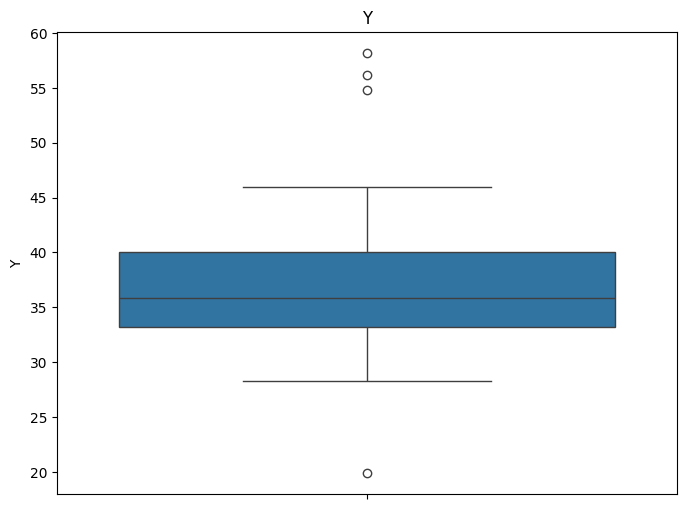

In [ ]:
# Boxplot untuk kolom 'Y'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Y'])
plt.title('Y')
plt.show()

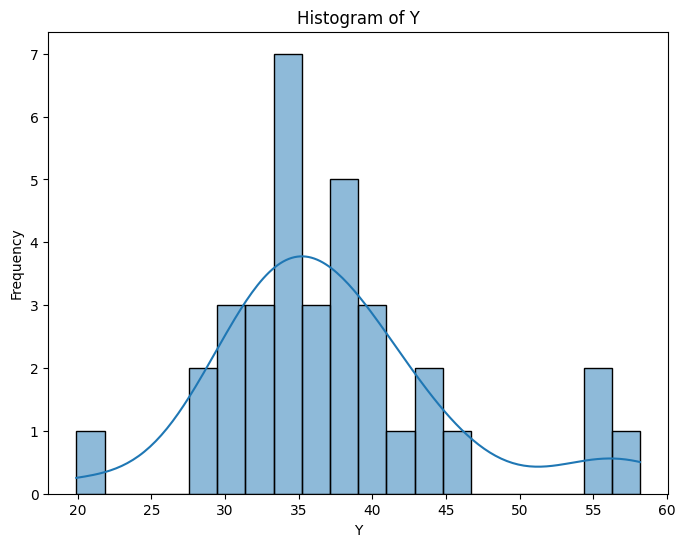

In [ ]:
# Histogram untuk kolom 'Y'
plt.figure(figsize=(8, 6))
sns.histplot(data['Y'], bins=20, kde=True)
plt.title('Histogram of Y')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.show()

# 2) Korelasi & Heatmap

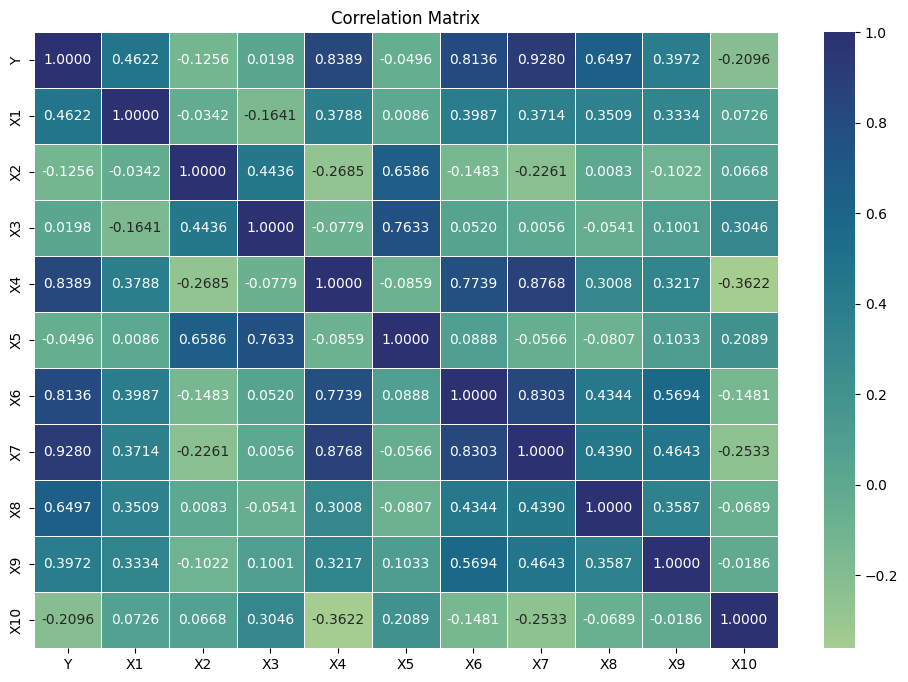

In [ ]:
# Menghitung korelasi antar variabel
correlation_matrix = data.corr()

# Plot heatmap untuk korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.4f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Y,1.000000,0.462199,-0.125601,0.019822,0.838873,-0.049599,0.813623,0.927957,0.649669,0.397180,-0.209640
X1,0.462199,1.000000,-0.034200,-0.164114,0.378762,0.008614,0.398720,0.371427,0.350900,0.333399,0.072561
X2,-0.125601,-0.034200,1.000000,0.443576,-0.268483,0.658618,-0.148272,-0.226106,0.008282,-0.102236,0.066788
X3,0.019822,-0.164114,0.443576,1.000000,-0.077935,0.763284,0.051954,0.005597,-0.054085,0.100138,0.304558
X4,0.838873,0.378762,-0.268483,-0.077935,1.000000,-0.085939,0.773885,0.876803,0.300829,0.321658,-0.362151
X5,-0.049599,0.008614,0.658618,0.763284,-0.085939,1.000000,0.088816,-0.056632,-0.080666,0.103344,0.208928
X6,0.813623,0.398720,-0.148272,0.051954,0.773885,0.088816,1.000000,0.830254,0.434387,0.569425,-0.148149
X7,0.927957,0.371427,-0.226106,0.005597,0.876803,-0.056632,0.830254,1.000000,0.439001,0.464320,-0.253313
X8,0.649669,0.350900,0.008282,-0.054085,0.300829,-0.080666,0.434387,0.439001,1.000000,0.358700,-0.068900
X9,0.397180,0.333399,-0.102236,0.100138,0.321658,0.103344,0.569425,0.464320,0.358700,1.000000,-0.018576


# 3) Persamaan Regresi Linear, Intercept, dan Koefisien Regresi

In [ ]:
# Menambahkan konstanta (intercept) ke model
X = sm.add_constant(X)

X

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.0,98.47,1059,78,5.80,2681,1,16.54,13.14,0.59,1
1,1.0,96.21,722,27,9.78,1640,2,22.17,14.09,0.34,2
2,1.0,98.04,614,706,8.22,4517,2,21.00,10.72,1.01,2
3,1.0,98.63,464,41,8.56,850,2,16.05,15.28,0.90,2
4,1.0,97.09,430,418,19.76,1627,3,31.09,20.15,0.59,1
5,1.0,99.49,248,284,27.56,3085,3,40.22,10.30,0.55,1
6,1.0,97.42,389,13,5.00,577,2,15.40,14.76,0.83,1
7,1.0,98.15,1001,32,9.10,1804,2,17.59,9.22,0.35,1
8,1.0,98.55,2592,647,10.42,18571,2,18.02,10.97,0.49,1
9,1.0,96.01,812,535,6.32,14490,2,14.37,10.95,0.48,2


In [ ]:
# Membuat model regresi linier
model = sm.OLS(Y, X)

# Melatih model
results = model.fit()

In [ ]:
# Menampilkan summary model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     69.02
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           9.87e-15
Time:                        09:21:42   Log-Likelihood:                -59.612
No. Observations:                  34   AIC:                             141.2
Df Residuals:                      23   BIC:                             158.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6110      8.708     -0.530      0.6

Text(0, 0.5, 'Frequency')

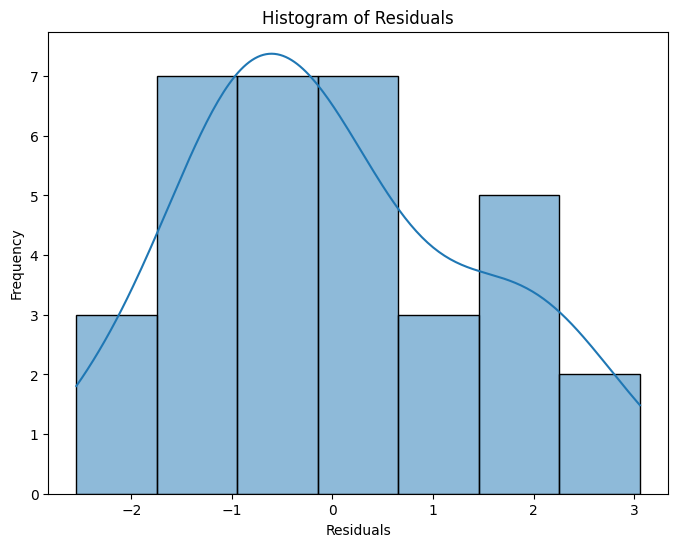

In [ ]:
# Plot histogram residuals untuk memeriksa normalitas
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# 4) Apakah model regresi yang terbentuk sudah cukup baik?

sudah cukup, karena model regresi yang terbentuk sudah terdapat:
1.   plot dan perhitungan summary data
2.   korelasi dan heatmap
3.   persamaan regresi linear, intercept, dan koefisien regresi
2.   variabel yang berpengaruh terhadap indeks alibaca pada taraf nyata 5%

# 5) Variabel mana yang berpengaruh terhadap Indeks Alibaca pada taraf nyata 5%. Berikan penjelasan statistik dan praktis mengenai pengaruh variabel tersebut!

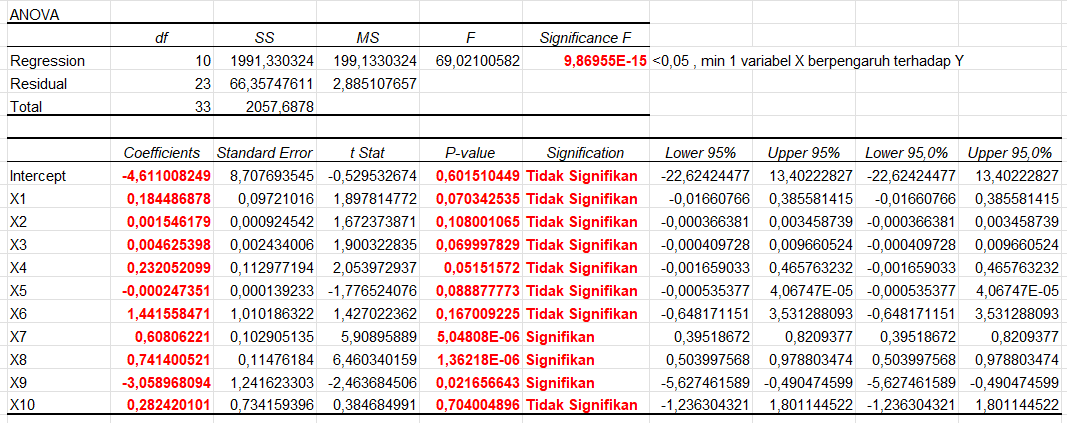